In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [21]:
# Add the latitudes and longitudes to a list

coordinates = list(lat_lngs)

In [23]:
from citipy import citipy

In [24]:
# Create a list for holding the cities

cities = []

# Identify the nearest city for each latitude and longitude combinaiton

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
# If the city is unique, then we will add it to the cities list

    if city not in cities:
        cities.append(city)
        
# Print th ecity count to confirm sufficient count

len(cities)

620

In [25]:
# Import the requests library

import requests

# Import the API key

from config import weather_api_key

In [26]:
# Starting URL for Weather Map API Call

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5195088b8504bbd0796aa4f556759d7d"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5195088b8504bbd0796aa4f556759d7d


In [27]:
# Import the datetime module from the datetime library

from datetime import datetime

In [31]:
# Create an empty list to hold the weather data

city_data =[]

# Print the beginning of the logging

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters

record_count = 1
set_count = 1

# Loop through all the cities in our list

for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes

    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city (for i, item in enumerate(list):)

    city_url = url + "&q=" + "i"

# Loop through all the cities in the list
    
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes

    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city

    city_url = url + "&q=" + city
    
    # Log the URL, record, and set numbers and the city

    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count

    record_count += 1
    
    # Run an API request for each of the cities
    
    try:
        
        # Parse the JSON and retrieve data
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list
        
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | ushuaia
Processing Record 2 of Set 13 | barrow
Processing Record 3 of Set 13 | amderma
City not found. Skipping...
Processing Record 4 of Set 13 | margate
Processing Record 5 of Set 13 | dikson
Processing Record 6 of Set 13 | mezen
Processing Record 7 of Set 13 | georgetown
Processing Record 8 of Set 13 | cape town
Processing Record 9 of Set 13 | punta arenas
Processing Record 10 of Set 13 | narsaq
Processing Record 11 of Set 13 | wajima
Processing Record 12 of Set 13 | qaanaaq
Processing Record 13 of Set 13 | rikitea
Processing Record 14 of Set 13 | cherskiy
Processing Record 15 of Set 13 | bengkulu
Processing Record 16 of Set 13 | kloulklubed
Processing Record 17 of Set 13 | port elizabeth
Processing Record 18 of Set 13 | tuktoyaktuk
Processing Record 19 of Set 13 | arraial do cabo
Processing Record 20 of Set 13 | lebu
Processing Record 21 of Set 13 | albany
Processing Record 22 of Set 13 | be

Processing Record 29 of Set 16 | gubkinskiy
Processing Record 30 of Set 16 | illoqqortoormiut
City not found. Skipping...
Processing Record 31 of Set 16 | richards bay
Processing Record 32 of Set 16 | guerrero negro
Processing Record 33 of Set 16 | adrar
Processing Record 34 of Set 16 | merauke
Processing Record 35 of Set 16 | manali
Processing Record 36 of Set 16 | san policarpo
Processing Record 37 of Set 16 | celldomolk
Processing Record 38 of Set 16 | evensk
Processing Record 39 of Set 16 | provideniya
Processing Record 40 of Set 16 | mount isa
Processing Record 41 of Set 16 | lima
Processing Record 42 of Set 16 | lavrentiya
Processing Record 43 of Set 16 | pallipattu
Processing Record 44 of Set 16 | fallon
Processing Record 45 of Set 16 | vila franca do campo
Processing Record 46 of Set 16 | aksarka
Processing Record 47 of Set 16 | pisco
Processing Record 48 of Set 16 | samusu
City not found. Skipping...
Processing Record 49 of Set 16 | hobyo
Processing Record 50 of Set 16 | sasky

Processing Record 15 of Set 20 | san vicente
Processing Record 16 of Set 20 | tahlequah
Processing Record 17 of Set 20 | sorland
Processing Record 18 of Set 20 | taltal
Processing Record 19 of Set 20 | alta floresta
Processing Record 20 of Set 20 | ust-kulom
Processing Record 21 of Set 20 | leningradskiy
Processing Record 22 of Set 20 | korla
Processing Record 23 of Set 20 | constitucion
Processing Record 24 of Set 20 | trinidad
Processing Record 25 of Set 20 | wilmington
Processing Record 26 of Set 20 | elk city
Processing Record 27 of Set 20 | honiara
Processing Record 28 of Set 20 | am timan
Processing Record 29 of Set 20 | krasnoselkup
Processing Record 30 of Set 20 | ilulissat
Processing Record 31 of Set 20 | taoudenni
Processing Record 32 of Set 20 | tura
Processing Record 33 of Set 20 | itatinga
Processing Record 34 of Set 20 | luorong
Processing Record 35 of Set 20 | atagay
Processing Record 36 of Set 20 | mayumba
Processing Record 37 of Set 20 | maniitsoq
Processing Record 38 

Processing Record 5 of Set 24 | vardo
Processing Record 6 of Set 24 | lewisporte
Processing Record 7 of Set 24 | sangar
Processing Record 8 of Set 24 | katobu
Processing Record 9 of Set 24 | slave lake
Processing Record 10 of Set 24 | luanda
Processing Record 11 of Set 24 | primorsko-akhtarsk
Processing Record 12 of Set 24 | hokitika
Processing Record 13 of Set 24 | sur
Processing Record 14 of Set 24 | uribia
Processing Record 15 of Set 24 | cazaje
City not found. Skipping...
Processing Record 16 of Set 24 | deer lake
Processing Record 17 of Set 24 | furstenwalde
Processing Record 18 of Set 24 | kirakira
Processing Record 19 of Set 24 | tsiroanomandidy
Processing Record 20 of Set 24 | san quintin
Processing Record 21 of Set 24 | morondava
Processing Record 22 of Set 24 | boituva
Processing Record 23 of Set 24 | essenbach
Processing Record 24 of Set 24 | charlestown
Processing Record 25 of Set 24 | yeniseysk
Processing Record 26 of Set 24 | meulaboh
Processing Record 27 of Set 24 | sant

In [33]:
len(city_data)

570

In [34]:
# Convert the array of dictionaries to a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,41.00,65,97,3.36,AR,2020-05-05 22:29:28
1,Barrow,71.29,-156.79,17.60,72,1,8.05,US,2020-05-05 22:28:58
2,Margate,51.38,1.39,48.99,82,0,17.65,GB,2020-05-05 22:30:07
3,Dikson,73.51,80.55,7.92,92,100,10.94,RU,2020-05-05 22:31:00
4,Mezen,65.85,44.24,30.60,98,20,3.15,RU,2020-05-05 22:31:00
5,Georgetown,5.41,100.34,80.60,94,40,4.70,MY,2020-05-05 22:31:01
6,Cape Town,-33.93,18.42,66.00,88,93,9.17,ZA,2020-05-05 22:26:36
7,Punta Arenas,-53.15,-70.92,41.00,86,99,5.82,CL,2020-05-05 22:28:02
8,Narsaq,60.92,-46.05,44.60,70,100,4.70,GL,2020-05-05 22:31:01
9,Wajima,37.40,136.90,56.26,73,71,3.94,JP,2020-05-05 22:31:01


In [38]:
# Re-arrange columns, put back into dataframe

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [37]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2020-05-05 22:29:28,-54.80,-68.30,41.00,65,97,3.36
1,Barrow,US,2020-05-05 22:28:58,71.29,-156.79,17.60,72,1,8.05
2,Margate,GB,2020-05-05 22:30:07,51.38,1.39,48.99,82,0,17.65
3,Dikson,RU,2020-05-05 22:31:00,73.51,80.55,7.92,92,100,10.94
4,Mezen,RU,2020-05-05 22:31:00,65.85,44.24,30.60,98,20,3.15
...,...,...,...,...,...,...,...,...,...
565,Praia Da Vitoria,PT,2020-05-05 22:32:41,38.73,-27.07,60.80,77,20,9.28
566,Kieta,PG,2020-05-05 22:32:41,-6.22,155.63,84.51,58,24,0.96
567,Batsfjord,NO,2020-05-05 22:32:41,70.63,29.72,39.20,64,75,9.17
568,Altona,DE,2020-05-05 22:32:41,53.55,9.93,48.20,61,42,8.05


In [39]:
# Create the output file(CSV)

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [40]:
# Extract relevant fields from the DataFrame for plotting

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

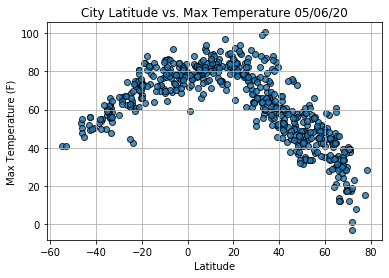

In [43]:
# Build the scatter plot for latitude vs. max temperature

import matplotlib.pyplot as plt
import time

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig1.png")

# Show plot

plt.show()

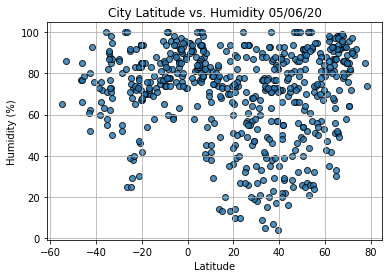

In [46]:
# Build the scatter plot for latitude vs. humidity

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig2.png")

# Show plot

plt.show()

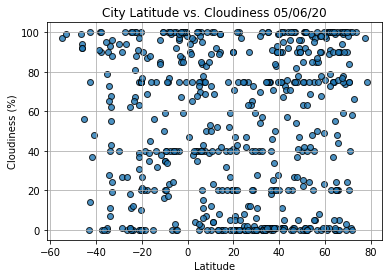

In [49]:
# Build the scatter plot for latitude vs. cloudiness

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig3.png")

# Show plot

plt.show()

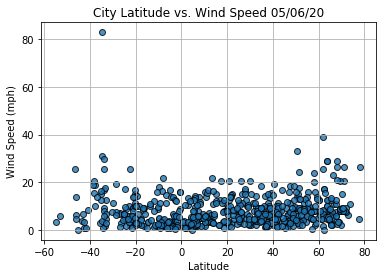

In [50]:
# Build the scatter plot for latitude vs. wind speed

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig4.png")

# Show plot

plt.show()